# Numerical solution of the differential equation

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import inspect
import textwrap

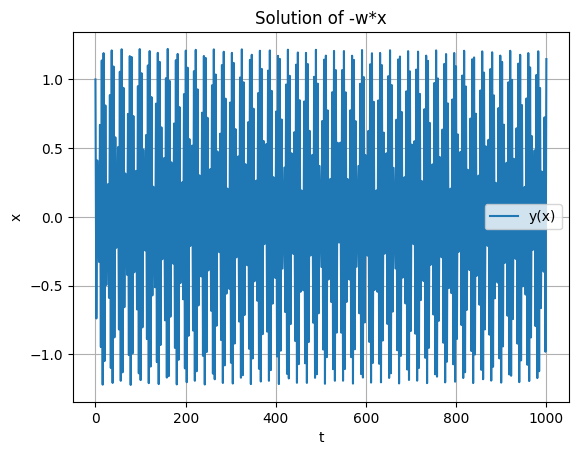

In [11]:
w = 2

def f(t,x):
    #write the function that is on the other side of the differential equation
    return -w*x

def differential_equation_1_order(t, x):
    dx_dt = f(t,x)
    return dx_dt

def differential_equation_2_order(t, X):
    #rewrite d^2x/dt^2 as dy/dt where y=dx/dt
    x, y = X
    dx_dt = y
    dy_dt = f(t,x)

    return [dx_dt, dy_dt]

# Extract the body of the function as a string
source = inspect.getsource(f)
body = textwrap.dedent(source).split('return')[-1].strip()

n_steps = 500
t_span = (0, 1000)      # time interval
t_eval = np.linspace(*t_span, n_steps)      # time interval
#x0 = [1.0]            # initial value(s)
x0 = [1.0, 1.0]            # initial value(s)

# Solve the ODE system
diff = differential_equation_2_order
sol = sp.integrate.solve_ivp(diff, t_span, x0, t_eval=t_eval, method='RK45')

# Plot the results
plt.plot(sol.t, sol.y[0], label='y(x)')
plt.xlabel('t')
plt.ylabel('x')
plt.title(f"Solution of {body}")
plt.legend()
plt.grid(True)
plt.show()

Initial energy E0 = 1.500000e+00
Max absolute deviation = 4.365441e-02
Max relative deviation = 2.910294e-02


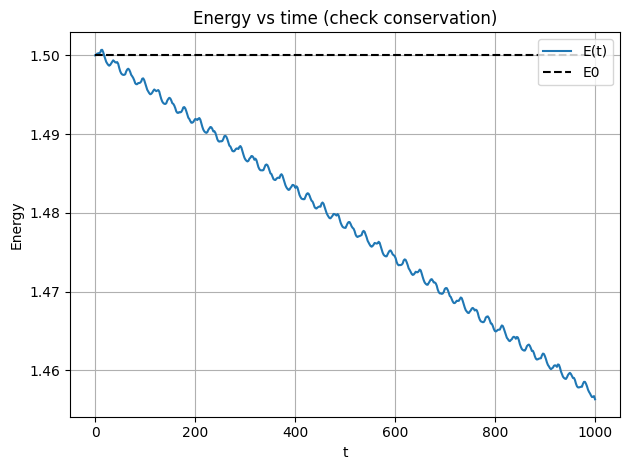

In [12]:
#Check energy conservation

# extract x and y arrays
x_t = sol.y[0]
y_t = sol.y[1]   # y = x'

# Energy for m=1, k = w
E_t = 0.5 * y_t**2 + 0.5 * w * x_t**2

# initial energy
E0 = E_t[0]

# diagnostics
abs_dev = np.max(np.abs(E_t - E0))
rel_dev = np.max(np.abs((E_t - E0) / E0))

print(f"Initial energy E0 = {E0:.6e}")
print(f"Max absolute deviation = {abs_dev:.6e}")
print(f"Max relative deviation = {rel_dev:.6e}")

plt.plot(sol.t, E_t, label='E(t)')
plt.hlines(E0, sol.t[0], sol.t[-1], colors='k', linestyles='dashed', label='E0')
#plt.ylim(0,2)
plt.xlabel('t')
plt.ylabel('Energy')
plt.title('Energy vs time (check conservation)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()